In [1]:
import os, sys, torch
import pandas as pd
import numpy as np
sys.path.append(os.path.abspath('../../modules'))
sys.path.append(os.path.abspath('../../modules/celeba_male'))
import vae_train as vt
import vae_ortho as vo
import vae_surgery as vs
import vae_os as vos
import vae_ascent as va
import vae_ad as vad
import classifier as cl
from vae import VAE

import batch as bt
import utility as ut

device = ut.get_device()

/Users/pman0581/miniconda3/envs/metal/lib/python3.11/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Epochs: 100%|███████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.34s/it]


Time taken by summarize_training is 0.4297 seconds
Time taken by run is 13.8169 seconds


AssertionError: Torch not compiled with CUDA enabled

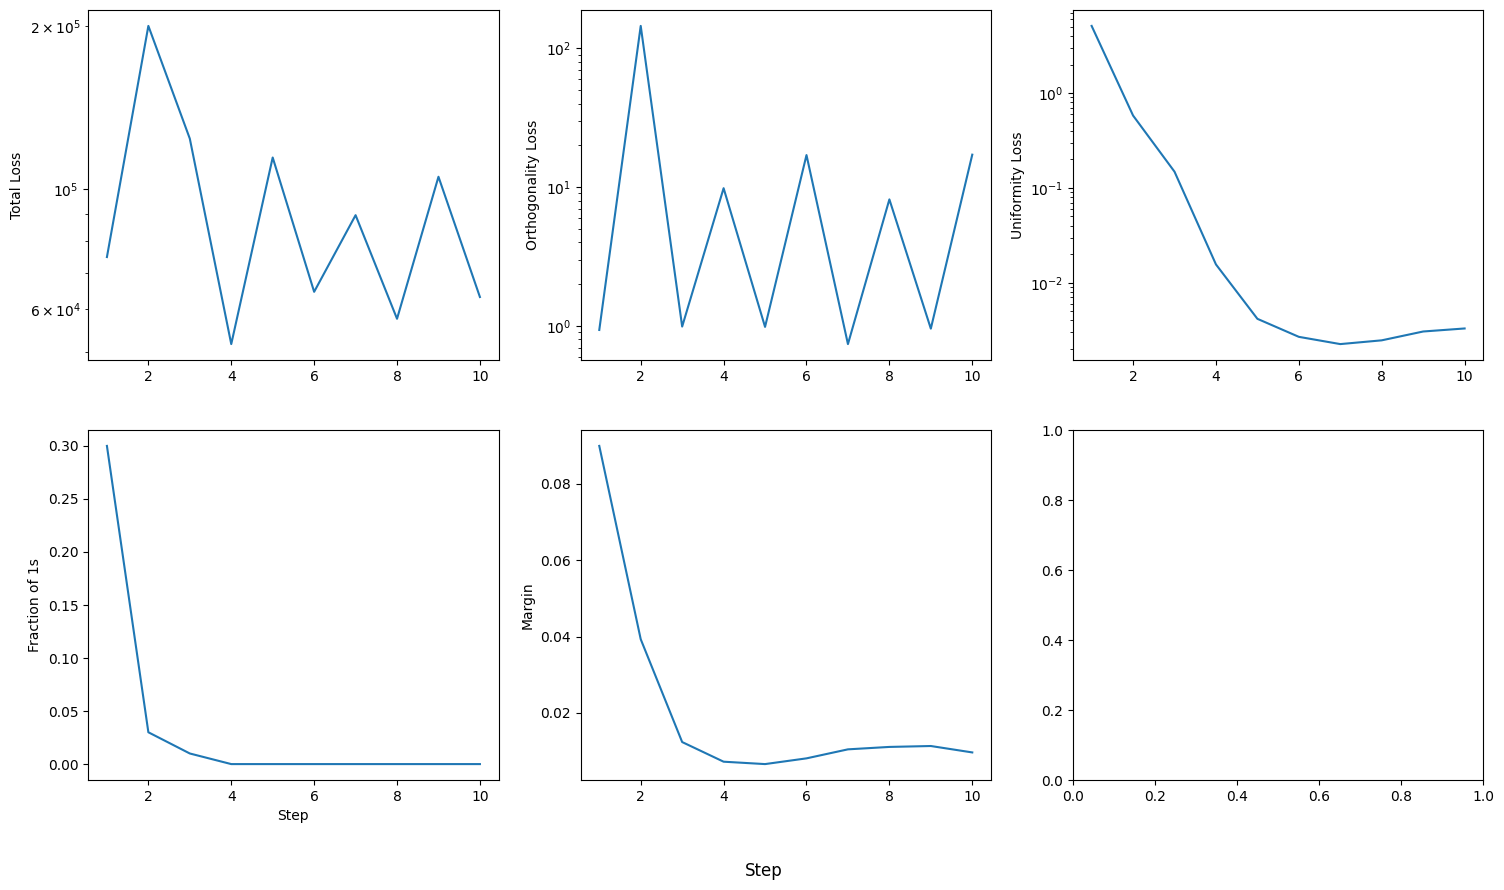

In [2]:
train_kwargs = {"model": "../../data/CelebA/vae/vae_200.pth", "latent_dim": 512,\
                "num_steps": 10, "batch_size": 200, "log_interval": 1, "collect_interval": "epoch",\
                "all_classes": [0, 1], "forget_class": 1,\
                "classifier_path": '../../data/CelebA/cnn/cnn_10.pth',\
                "kl_weight": 1, "uniformity_weight": 1e3, "orthogonality_weight": 1e3, "forget_weight": 0.,\
                'data_path': '../../data/CelebA/dataset', "max_data": 2000,\
                "total_duration": None}

suffix = 'batch'
train_kwargs["folder"] = f"../../data/CelebA/male/vae_{suffix}"

be = bt.BatchExperiment(vos.train, train_kwargs, 1)
be.run()

be.summarize_wo_fid()

In [6]:
be.fid(1000, 'mps')

Time taken by compute_fid_from_folder is 27.8403 seconds
Time taken by compute_fid_from_folder is 329.4528 seconds
Time taken by compute_fid_from_folder is 232.0904 seconds
Time taken by compute_fid_from_folder is 370.5421 seconds
Time taken by compute_fid_from_folder is 378.7608 seconds
Time taken by fid is 1339.9435 seconds
